# Part 1: Exploratory Data Analysis on Logins #

In this notebook, I explore the login data and plot some patterns I observed in it.

In [43]:
# standard imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
#import json file into a pandas dataframe

login_df = pd.read_json('../data/raw/logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [41]:
# chcek login info for nulls or other data problems
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


There are no missing values that need to be deleted or filled in.

In [45]:
#describe data to look for outliers or other red flags

login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


This looks good. A few non-unique times, but that could be two people logging in at the same time.

In [46]:
# set the login time as the index for resampling

login_df = login_df.set_index('login_time').sort_index()

In [47]:
# now to aggregate by 15 minute intervals and examine the data
login_df['count_login'] = 1
login_df = login_df.sort_index()
df_15 = login_df.resample('15min').sum()
df_15.describe()

,count_login
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


No outliers after aggregating.

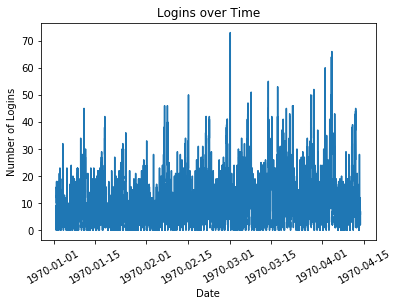

In [48]:
# Generate a plot of all the data to look for patterns

plt.plot(df_15)
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.title('Logins over Time')
plt.xticks(rotation="30")
plt.show()

There appear to be weekly and daily cycles. Now to plot by weeks and days, and look at weekends versus weekdays.

In [49]:
# create column for day of week
df_15 = df_15.reset_index()
df_15['day_of_week'] = df_15['login_time'].apply(lambda x: x.day_name())
cat_type = pd.CategoricalDtype(categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                              'Friday', 'Saturday', 'Sunday'], ordered=True)
df_15['day_of_week'] = df_15['day_of_week'].astype(cat_type)
df_15.head()

,login_time,count_login,day_of_week
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [50]:
# create column for time of day

df_15['time'] = df_15['login_time'].dt.time
df_15.head()

,login_time,count_login,day_of_week,time
0,1970-01-01 20:00:00,2,Thursday,20:00:00
1,1970-01-01 20:15:00,6,Thursday,20:15:00
2,1970-01-01 20:30:00,9,Thursday,20:30:00
3,1970-01-01 20:45:00,7,Thursday,20:45:00
4,1970-01-01 21:00:00,1,Thursday,21:00:00


Text(0.5, 1.0, 'Average Number of Logins by Time of Day')

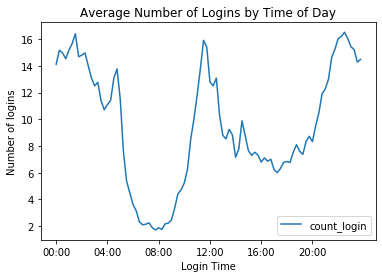

In [51]:
# plot average logins by time of day

by_time = df_15[['count_login', 'login_time']].groupby(df_15.login_time.dt.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)
plt.ylabel('Number of logins')
plt.xlabel('Login Time')
plt.title('Average Number of Logins by Time of Day')

Text(0.5, 1.0, 'Average Number of Logins by Day of Week')

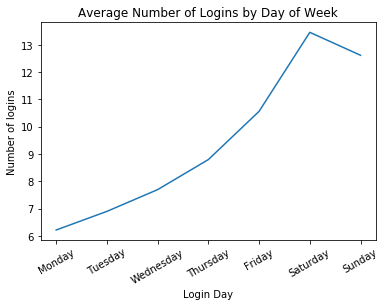

In [38]:
# plot average logins by 

by_wkday = df_15[['count_login', 'day_of_week']].groupby(df_15['day_of_week']).mean()
plt.plot(by_wkday.index, by_wkday['count_login'])
plt.xticks(rotation="30")
plt.ylabel('Number of logins')
plt.xlabel('Login Day')
plt.title('Average Number of Logins by Day of Week')

### Patterns Noticed ###

It appears that logins have two daily peaks, around noon and overnight, and two dips, the deepest one at 8am, and another one in the afternoon.

It also appears that logins increase over the course of the  week and are highest on weekends.